Integrantes: Lucas Vergara, Ignacio Moya, Camilo Olguín

In [5]:
import pandas as pd
from scipy import stats
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

# Leer un archivo CSV
df = pd.read_csv('/content/drive/My Drive/MDD/preciocasas.csv')

# Renombrar las cabeceras
df = df.rename(columns={'Price_CLP': 'Precio', 'Dorms': 'Dormitorios', 'Baths': 'Banos',
                        'Built Area': 'Area Construida', 'Total Area': 'Area Total',
                        'Parking': 'Estacionamientos'})

# Quitar filas vacías
df = df.dropna(how='all')

# Quitar duplicados
df = df.drop_duplicates()

# Reemplazar nombres de comunas
df['Comuna'] = df['Comuna'].replace({'EstaciónCentral': 'Estacion Central', 'Maipú': 'Maipu',
                                      'Ñuñoa': 'Nunoa', 'Peñalolen': 'Penalolen', 'SanRamón': 'San Ramon',
                                      'Conchalí': 'Conchali', 'Peñaflor': 'Penaflor', 'Curacaví': 'Curacavi'})

# Eliminar columnas no necesarias
df = df.drop(columns=['Price_USD', 'Price_UF', 'id', 'Realtor', 'Ubicacion'])

# Filtrar los outliers en la columna 'Precio'
alpha = 0.004
limite_inferior = df['Precio'].quantile(alpha)
limite_superior = df['Precio'].quantile(1 - alpha)

df = df[(df['Precio'] >= limite_inferior) & (df['Precio'] <= limite_superior)]

# Quitar filas con 'Precio' no numérico o NaN
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df = df.dropna(subset=['Precio'])

# Filtrar registros donde Área Total sea mayor a 20,000, Área Construida mayor a 2,500, Dormitorios mayor a 15 y Baños mayor a 10
df = df[(df['Area Total'] <= 20000) & (df['Estacionamientos'] <= 50) & (df['Area Construida'] <= 2500) & (df['Dormitorios'] <= 15) & (df['Banos'] <= 10)]

# Mostrar estadísticas después de eliminar registros
print(f"Cantidad de filas después de filtrar: {len(df)}")

# 1. Calcular las frecuencias de la variable dependiente
frecuencias = df['Precio'].value_counts().sort_index()

# 2. Calcular las medidas de tendencia central y dispersión
media = df['Precio'].mean()
mediana = df['Precio'].median()
desv_std = df['Precio'].std()
cuartiles = df['Precio'].quantile([0.25, 0.5, 0.75])

# 3. Calcular los valores mínimos y máximos
minimo = df['Precio'].min()
maximo = df['Precio'].max()

# 4. Resumen estadístico de la variable dependiente
resumen = df['Precio'].describe()

# Mostrar resultados
print(f"Frecuencias:\n{frecuencias}")
print(f"\nMedia: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación Estándar: {desv_std}")
print(f"Cuartiles:\n{cuartiles}")
print(f"Valor Mínimo: {minimo}")
print(f"Valor Máximo: {maximo}")
print(f"\nResumen estadístico:\n{resumen}")

# Opcional: correlación entre la variable dependiente y otras variables
columnas_interes = ['Precio', 'Dormitorios', 'Area Total', 'Estacionamientos', 'Area Construida', 'Banos']

# Calcular la correlación solo para las columnas seleccionadas
correlaciones = df[columnas_interes].corr()['Precio']
print(f"\nCorrelación con las columnas seleccionadas:\n{correlaciones}")

# Guardar el nuevo archivo CSV sin outliers, sin áreas grandes y sin dormitorios o baños excesivos
df.to_csv('preciocasas_limpiado.csv', index=False)

# Información del dataframe final
df.info()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Cantidad de filas después de filtrar: 5200
Frecuencias:
Precio
30000000      1
35000000      1
37000000      2
39000000      1
40000000      1
             ..
2099810000    1
2106928000    1
2128282000    2
2131841000    2
2135400000    5
Name: count, Length: 1455, dtype: int64

Media: 370018488.4001923
Mediana: 221013900.0
Desviación Estándar: 354656637.87695086
Cuartiles:
0.25    126987382.5
0.50    221013900.0
0.75    508937000.0
Name: Precio, dtype: float64
Valor Mínimo: 30000000
Valor Máximo: 2135400000

Resumen estadístico:
count    5.200000e+03
mean     3.700185e+08
std      3.546566e+08
min      3.000000e+07
25%      1.269874e+08
50%      2.210139e+08
75%      5.089370e+08
max      2.135400e+09
Name: Precio, dtype: float64

Correlación con las columnas seleccionadas:
Precio              1.000000
Dormitorios         0.453106
Area Total          0.413

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


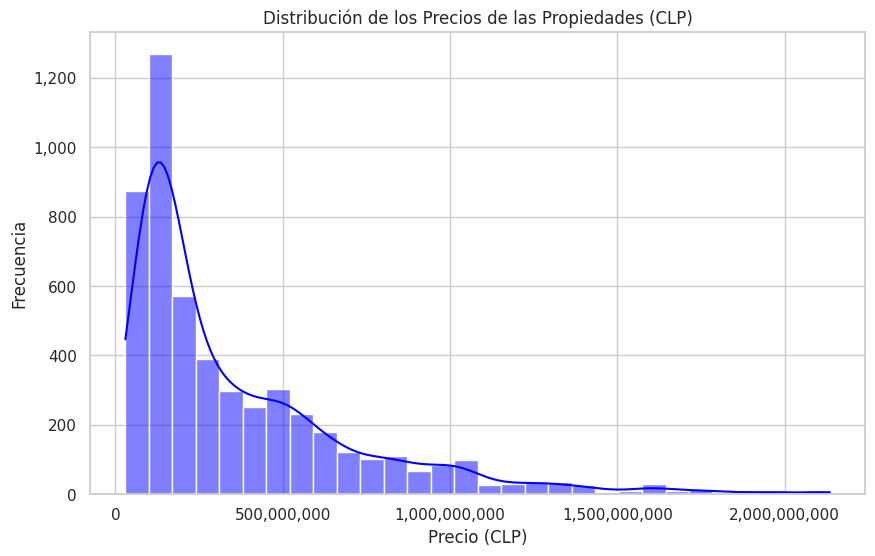

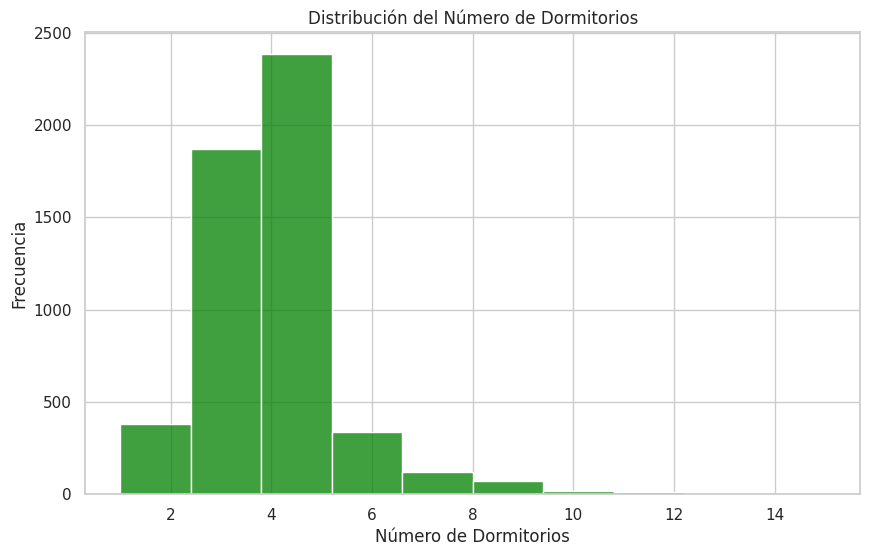

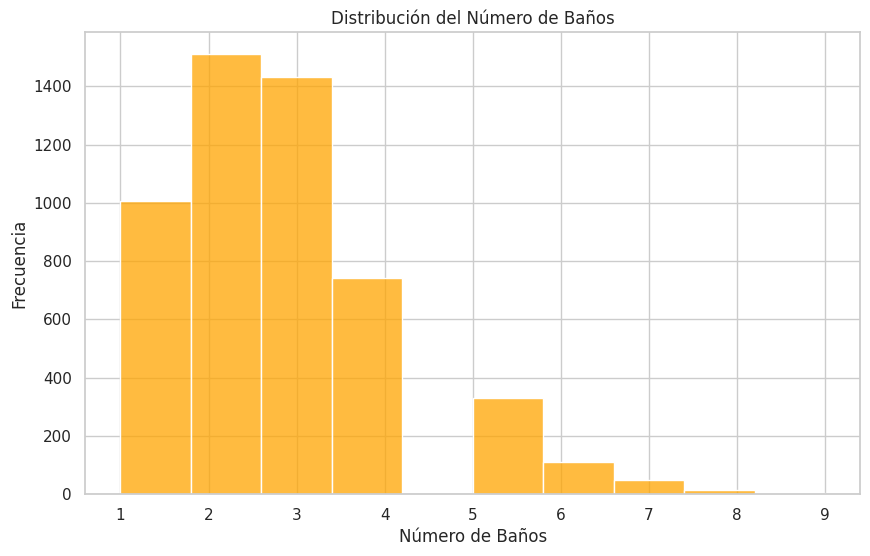

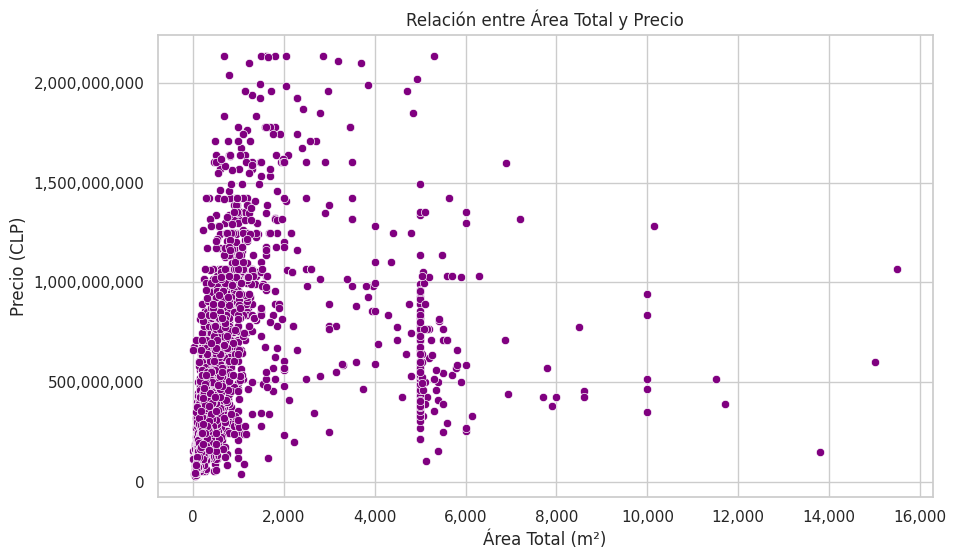

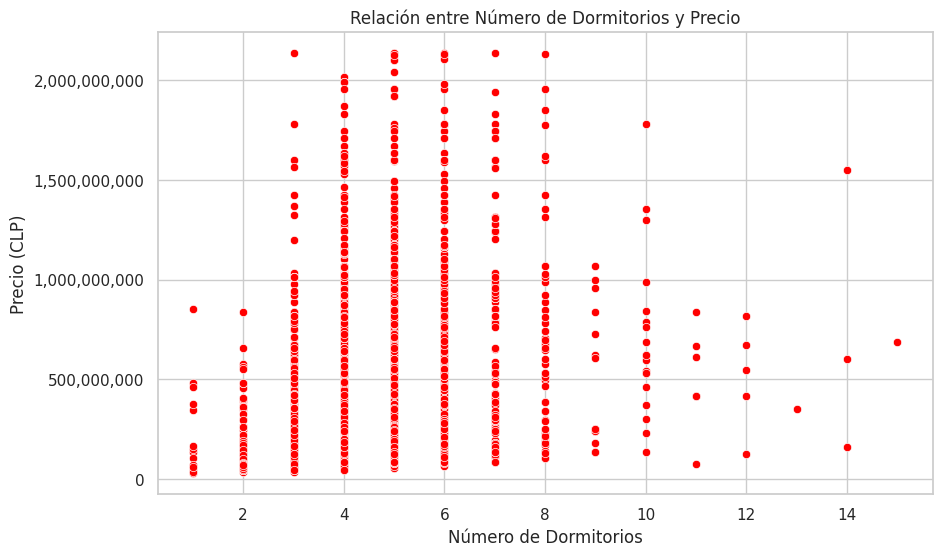

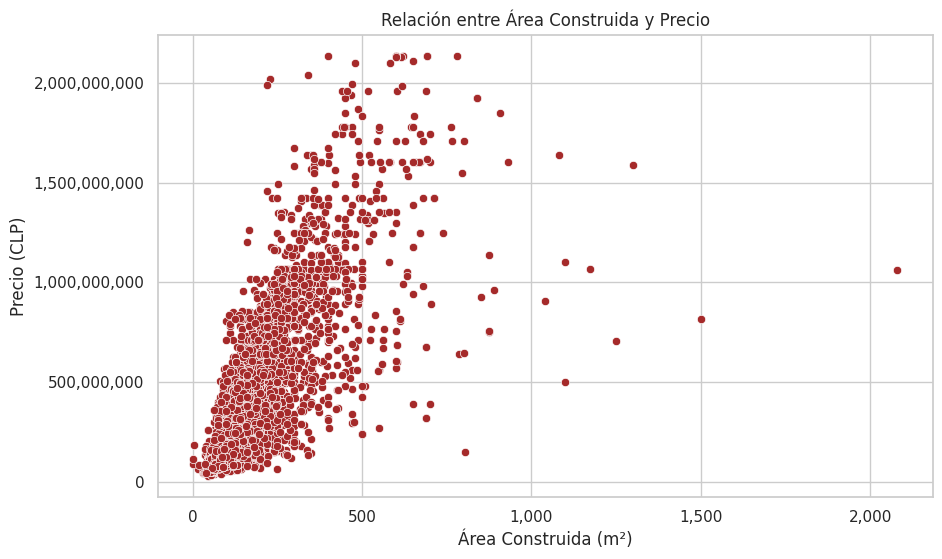

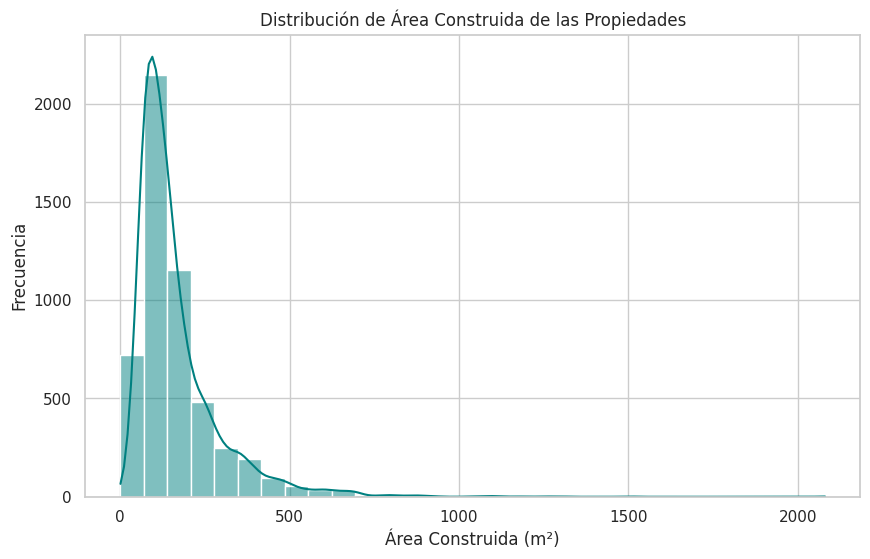

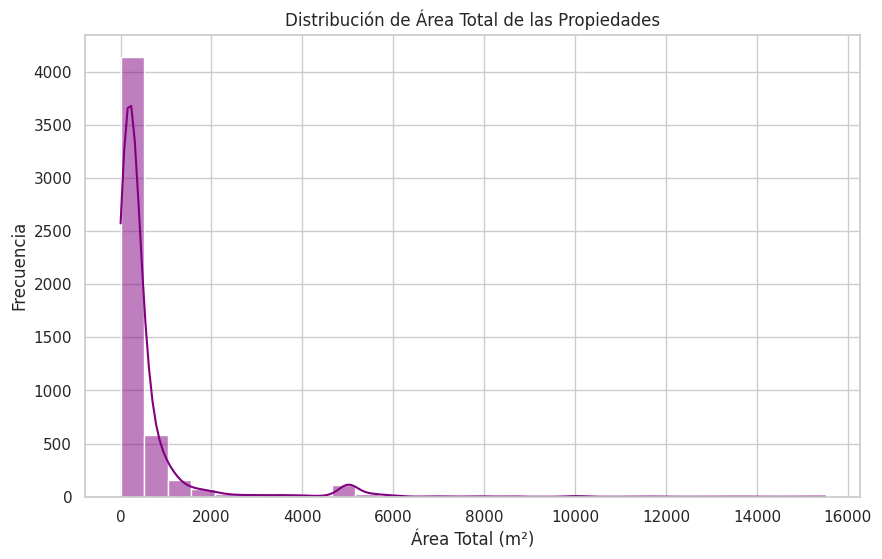

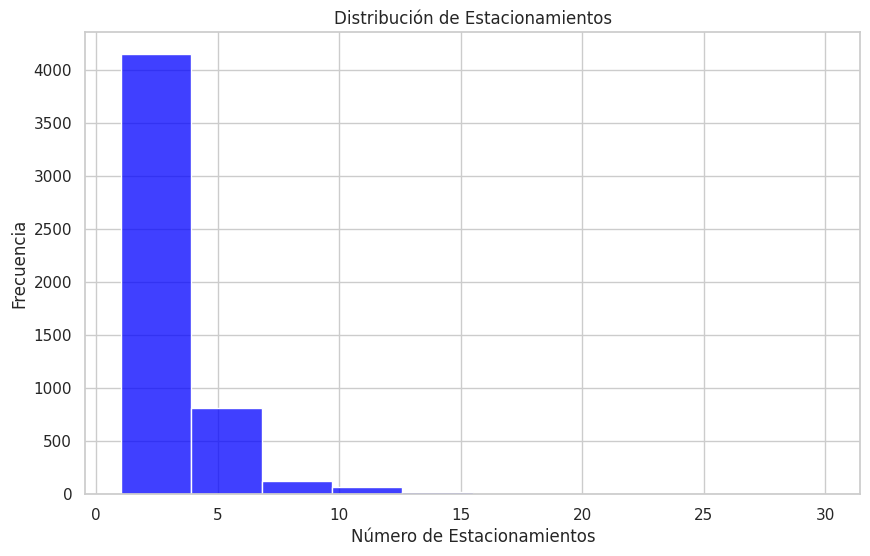

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
drive.mount('/content/drive/')

# Leer un archivo CSV
df = pd.read_csv('/content/drive/My Drive/MDD/preciocasas_limpiado.csv')


# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Función para formatear los valores en CLP sin notación científica
def format_price_axis(ax):
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

# Histograma de la distribución del Precio (CLP)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Precio'], bins=30, kde=True, color='blue')
format_price_axis(ax)
plt.title('Distribución de los Precios de las Propiedades (CLP)')
plt.xlabel('Precio (CLP)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la distribución del número de dormitorios
plt.figure(figsize=(10, 6))
sns.histplot(df['Dormitorios'], bins=10, kde=False, color='green')
plt.title('Distribución del Número de Dormitorios')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la distribución del número de baños
plt.figure(figsize=(10, 6))
sns.histplot(df['Banos'].dropna(), bins=10, kde=False, color='orange')
plt.title('Distribución del Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión entre Área Total y Precio
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Area Total', y='Precio', data=df, color='purple')
format_price_axis(ax)
plt.title('Relación entre Área Total y Precio')
plt.xlabel('Área Total (m²)')
plt.ylabel('Precio (CLP)')
plt.show()

# Gráfico de dispersión entre Dormitorios y Precio
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Dormitorios', y='Precio', data=df, color='red')
format_price_axis(ax)
plt.title('Relación entre Número de Dormitorios y Precio')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio (CLP)')
plt.show()

# Gráfico de dispersión entre Área Construida y Precio
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Area Construida', y='Precio', data=df, color='brown')
format_price_axis(ax)
plt.title('Relación entre Área Construida y Precio')
plt.xlabel('Área Construida (m²)')
plt.ylabel('Precio (CLP)')
plt.show()

# Histograma de la distribución del Área Construida
plt.figure(figsize=(10, 6))
sns.histplot(df['Area Construida'].dropna(), bins=30, kde=True, color='teal')
plt.title('Distribución de Área Construida de las Propiedades')
plt.xlabel('Área Construida (m²)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la distribución del Área Total
plt.figure(figsize=(10, 6))
sns.histplot(df['Area Total'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribución de Área Total de las Propiedades')
plt.xlabel('Área Total (m²)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la distribución de Estacionamientos
plt.figure(figsize=(10, 6))
sns.histplot(df['Estacionamientos'].dropna(), bins=10, kde=False, color='blue')
plt.title('Distribución de Estacionamientos')
plt.xlabel('Número de Estacionamientos')
plt.ylabel('Frecuencia')
plt.show()


Matriz de Correlaciones:
                    Precio  Area Construida  Area Total  Dormitorios  \
Precio            1.000000         0.773108    0.413712     0.453106   
Area Construida   0.773108         1.000000    0.466945     0.527483   
Area Total        0.413712         0.466945    1.000000     0.247015   
Dormitorios       0.453106         0.527483    0.247015     1.000000   
Banos             0.699315         0.657261    0.401109     0.587092   
Estacionamientos  0.513586         0.509654    0.518074     0.308202   

                     Banos  Estacionamientos  
Precio            0.699315          0.513586  
Area Construida   0.657261          0.509654  
Area Total        0.401109          0.518074  
Dormitorios       0.587092          0.308202  
Banos             1.000000          0.422322  
Estacionamientos  0.422322          1.000000  


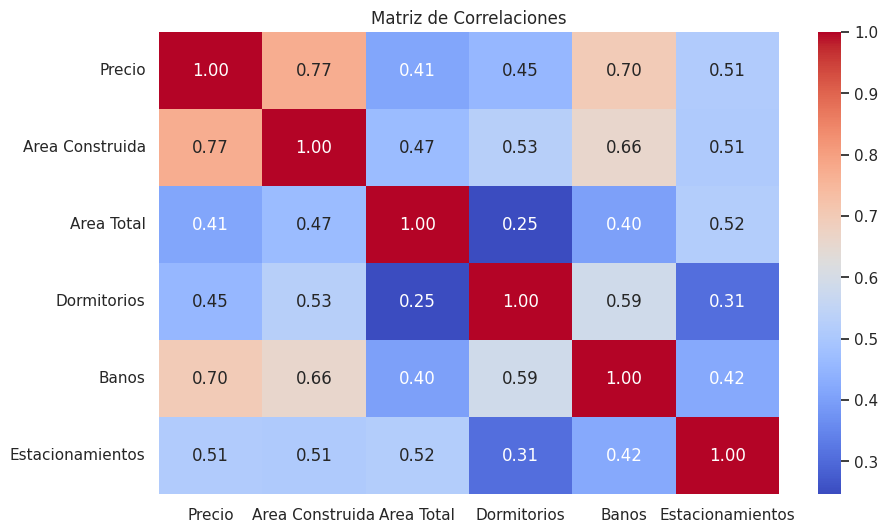

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('preciocasas_limpiado.csv')

# Renombrar columnas para mayor claridad
df = df.rename(columns={
    'Price_CLP': 'Precio',
    'Built Area': 'Area Construida',
    'Total Area': 'Area Total',
    'Dorms': 'Dormitorios',
    'Baths': 'Banos',
    'Parking': 'Estacionamientos'
})

# Seleccionar las variables relevantes
variables = ['Precio', 'Area Construida', 'Area Total', 'Dormitorios', 'Banos', 'Estacionamientos']
df = df[variables]

# Convertir columnas a formato numérico y manejar errores
df = df.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
correlaciones = df.corr()

# Mostrar la matriz de correlación en consola
print("Matriz de Correlaciones:")
print(correlaciones)

# Visualización del heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlaciones')
plt.show()


In [8]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/MDD/preciocasas_limpiado.csv'
data_clean = pd.read_csv(file_path)

# Convertir la columna 'Precio' a formato numérico, evitando los valores no numéricos
data_clean['Precio'] = pd.to_numeric(data_clean['Precio'], errors='coerce')

# Eliminar las filas con valores nulos en 'Precio' después de la conversión
data_clean_cleaned = data_clean.dropna(subset=['Precio'])

# Crear los nuevos rangos de precios (4 rangos)
bins = [
    data_clean_cleaned['Precio'].min(),  # Valor mínimo de 'Precio'
    data_clean_cleaned['Precio'].quantile(0.25),  # Primer cuartil
    data_clean_cleaned['Precio'].quantile(0.5),   # Mediana
    data_clean_cleaned['Precio'].quantile(0.75),  # Tercer cuartil
    data_clean_cleaned['Precio'].max()            # Valor máximo de 'Precio'
]
labels = ['bajo', 'medio bajo', 'medio alto', 'alto']

# Crear la nueva columna de rangos de precio
data_clean_cleaned['Precio_Rango'] = pd.cut(
    data_clean_cleaned['Precio'], bins=bins, labels=labels, include_lowest=True
)

# Eliminar filas con valores nulos en 'Precio_Rango' (por si acaso)
data_clean_cleaned = data_clean_cleaned.dropna(subset=['Precio_Rango'])

# Selección de características numéricas
X = data_clean_cleaned[['Area Construida', 'Area Total', 'Dormitorios', 'Banos']]
y = data_clean_cleaned['Precio_Rango']

# Codificar la variable objetivo (Rango de Precio)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)
# 1. Entrenar y evaluar Red Bayesiana
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# 2. Entrenar y evaluar SVM con kernel lineal
svm_linear = svm.SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

# 3. Entrenar y evaluar SVM con kernel polinomial
svm_poly = svm.SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

# 4. Entrenar y evaluar SVM con kernel RBF
svm_rbf = svm.SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


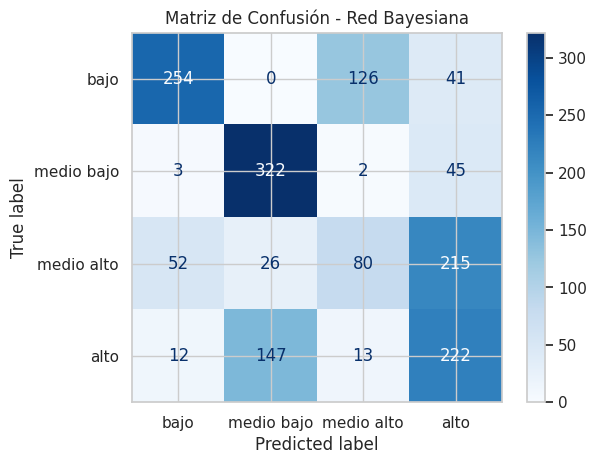

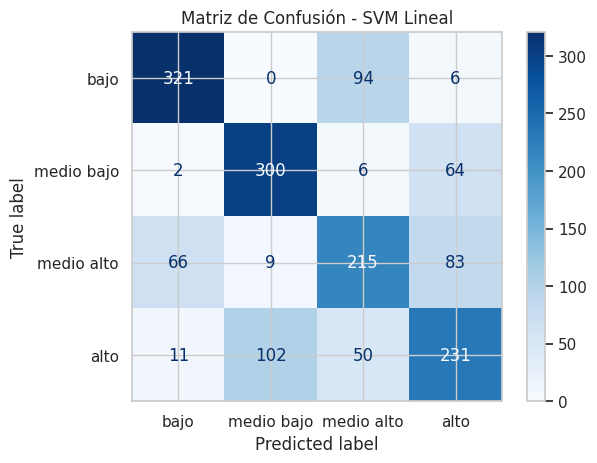

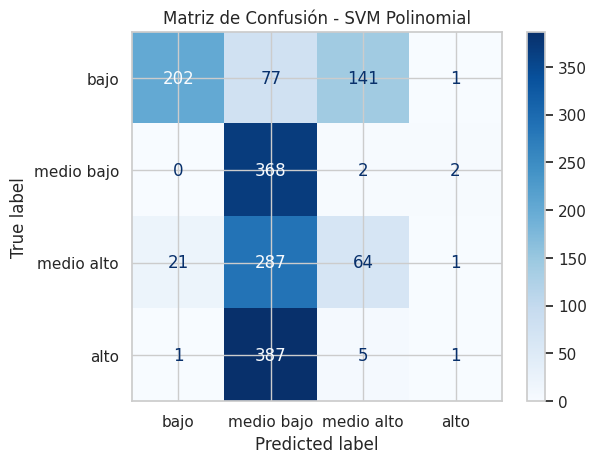

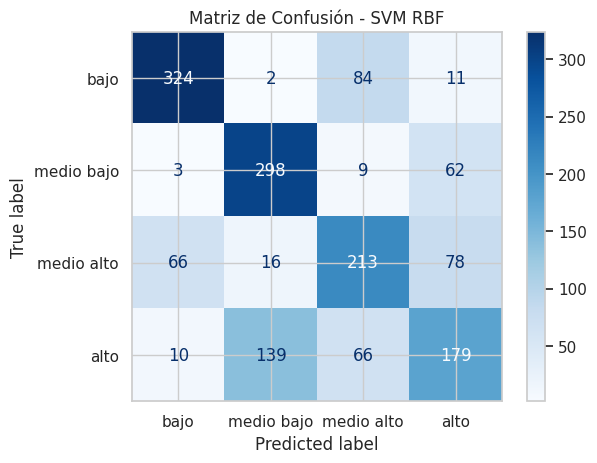


Métricas para Red Bayesiana:
              precision    recall  f1-score   support

        bajo       0.79      0.60      0.68       421
  medio bajo       0.65      0.87      0.74       372
  medio alto       0.36      0.21      0.27       373
        alto       0.42      0.56      0.48       394

    accuracy                           0.56      1560
   macro avg       0.56      0.56      0.55      1560
weighted avg       0.56      0.56      0.55      1560

Exactitud (Accuracy) de Red Bayesiana: 0.56

Métricas para SVM Lineal:
              precision    recall  f1-score   support

        bajo       0.80      0.76      0.78       421
  medio bajo       0.73      0.81      0.77       372
  medio alto       0.59      0.58      0.58       373
        alto       0.60      0.59      0.59       394

    accuracy                           0.68      1560
   macro avg       0.68      0.68      0.68      1560
weighted avg       0.68      0.68      0.68      1560

Exactitud (Accuracy) de SVM L

In [10]:
# Imprimir las matrices de confusión para cada modelo
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_names = ['Red Bayesiana', 'SVM Lineal', 'SVM Polinomial', 'SVM RBF']
predictions = [y_pred_nb, y_pred_svm_linear, y_pred_svm_poly, y_pred_svm_rbf]

for name, y_pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

from sklearn.metrics import classification_report, accuracy_score

# Mostrar las métricas de cada modelo
for name, y_pred in zip(model_names, predictions):
    print(f"\nMétricas para {name}:")
    # Mostrar el reporte de clasificación con precisión, recall y F1-score
    print(classification_report(y_test, y_pred, target_names=labels))
    # Calcular y mostrar la exactitud (accuracy) del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Exactitud (Accuracy) de {name}: {accuracy:.2f}")







In [9]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
# K-means clustering basado en Baños y Area Construida 4 grupos

kmeans = cluster.KMeans(4)
kmeans.fit(df[['Area Total', 'Area Construida']])
labels = kmeans.labels_
plt.scatter(df['Area Total'], df['Area Construida'], c=labels)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(df[['Area Total']])
    distortions.append(sum(np.min(cdist(df[['Area Total']], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df[['Area Total']].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia Minima Media')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.show()

df_casas = df.sample(10)
df_casas
distancias = linkage(df_casas[['Precio']].values, 'complete')
etiquetas = df_casas.Comuna.values
plt.figure(figsize=(30, 20))
dendrogram(distancias, orientation='top',labels = etiquetas, distance_sort='descending',show_leaf_counts=True)
plt.show()

